In [15]:
import random
import numpy as np
from matplotlib import pyplot as plt

Increment: 1
Buyers 5
Increment 1
Average Reserve 0.0
Iterations 10000
Average Price 58.895
Average Profit 52946.605





Ryan Richardson

CS532

Project 1
# Ascending Clock Auction

In [ ]:
def generateBuyers(numBuyers):
    buyers = np.array([])
    for _ in range(numBuyers):
        buyers = np.append(buyers, random.randint(1, 20) * 5)
    return buyers


def runAuction(buyers, reservePrice, startingPrice=0, startingIncrement=1):
    if reservePrice == 0:
        previousPrice = startingPrice
        currentPrice = startingPrice
    else:
        previousPrice = reservePrice
        # set to reserve so that if a tie happens we sell at the reserve
        currentPrice = reservePrice
        # we can skip the iteration for prices below the reserve price to save time,
        # since no sale will take place until after the reserve has been met
    while len(buyers) > 1:
        if currentPrice > 100:  # max value is 100, no need to go above 100
            return 0
        buyersToRemove = np.array([])
        for buyer in buyers:
            if currentPrice > buyer:
                buyersToRemove = np.append(buyersToRemove, buyer)
                if len(buyersToRemove) == len(buyers):
                    # if the number of buyers to remove is equal to the number of buyers left,
                    # then there's a tie. we don't really care which buyer wins
                    # just choose any and  sell at the previous price
                    # if the tie happens at the reserve, then we sell for the reserve price
                    return previousPrice
                buyers = [b for b in buyers if b not in buyersToRemove]
                if len(buyers) == 1 and buyers[0] >= currentPrice:
                    # if only 1 buyer remains and their price is at least equal to the reserve price
                    return currentPrice
        previousPrice = currentPrice
        currentPrice += startingIncrement
    return 0  # something bad happened, return 0


prices = np.array([])
reserves = np.array([])
averageProfit = np.array([])
iterations = 1000
newBuyers = []
increment = 0
for _ in range(iterations):
    newBuyers = generateBuyers(5)
    reserve = 0
    reserves = np.append(reserves, reserve)
    increment = 1
    prices = np.append(prices, runAuction(buyers=newBuyers, startingIncrement=increment, reservePrice=reserve))

numPricesAboveZero = len([p for p in prices if p > 0])
profit = np.mean(prices) * numPricesAboveZero
averageProfit = np.append(averageProfit, profit)
# this should give us a better estimate of profit than just looking at the average price

print(f"Increment: 1\nBuyers {len(newBuyers)}\nIncrement {increment}\nAverage Reserve {np.mean(reserves)}"
      f"\nIterations {10000}\nAverage Price {np.mean(prices)}\nAverage Profit {np.mean(averageProfit)}\n\n\n")

Average Price seems to hover around 58, and profit is about 50,000

In [16]:
prices = np.array([])
reserves = np.array([])
averageProfit = np.array([])
iterations = 1000
newBuyers = []
increment = 0
for _ in range(iterations):
    newBuyers = generateBuyers(5)
    reserve = 0
    reserves = np.append(reserves, reserve)
    increment = 10
    prices = np.append(prices, runAuction(buyers=newBuyers, startingIncrement=increment, reservePrice=reserve))

numPricesAboveZero = len([p for p in prices if p > 0])
profit = np.mean(prices) * numPricesAboveZero
averageProfit = np.append(averageProfit, profit)
# this should give us a better estimate of profit than just looking at the average price

print(
    f"Increment: 1\nBuyers {len(newBuyers)}\nIncrement {increment}\nAverage Reserve {np.mean(reserves)}"
    f"\nIterations {10000}\nAverage Price {np.mean(prices)}\nAverage Profit {np.mean(averageProfit)}\n\n\n")

Increment: 1
Buyers 5
Increment 10
Average Reserve 0.0
Iterations 10000
Average Price 54.43
Average Profit 43271.85





Average Price seems to hover around 55, so it is less than when we used an increment of 1. This is likely because it's possible to skip past someone's reserve entirely, where a $1 increment ensures you will hit every buyer's reserve price at least once.

The profit has also dropped significantly, likely for the same reasons as above, we get more auctions ending in $0 bids at a lower price

In [17]:
prices = np.array([])
reserves = np.array([])
averageProfit = np.array([])
iterations = 1000
newBuyers = []
increment = 0
for _ in range(iterations):
    newBuyers = generateBuyers(20)
    reserve = 0
    reserves = np.append(reserves, reserve)
    increment = 1
    prices = np.append(prices, runAuction(buyers=newBuyers, startingIncrement=increment, reservePrice=reserve))

numPricesAboveZero = len([p for p in prices if p > 0])
profit = np.mean(prices) * numPricesAboveZero
averageProfit = np.append(averageProfit, profit)
# this should give us a better estimate of profit than just looking at the average price

print(f"Increment: 1\nBuyers {len(newBuyers)}\nIncrement {increment}\nAverage Reserve {np.mean(reserves)}"
      f"\nIterations {10000}\nAverage Price {np.mean(prices)}\nAverage Profit {np.mean(averageProfit)}\n\n\n")

Increment: 1
Buyers 20
Increment 1
Average Reserve 0.0
Iterations 10000
Average Price 66.306
Average Profit 50392.56





Average price jumps up to about 65. This is significantly higher than either of the previous simulations.
The more buyers you have, the larger the range of bids, which should mean you get higher bids on average

However, the profit is still a bit lower at this rate, likely because the average price increases hasn't offset the number of $0 auctions

In [18]:
averagePrices = np.array([])
averageReserve = np.array([])
averageProfit = np.array([])
newBuyers = []
increment = 0
for i in range(100): # this range was the final test for the best reserve price.
    # Reasons are listed below, but this can be easily changed to plot
    # average profit across the entire range of eligible prices.
    prices = np.array([])
    reserves = np.array([])
    iterations = 100
    for _ in range(iterations):
        newBuyers = generateBuyers(20)
        reserve = i
        reserves = np.append(reserves, reserve)
        increment = 1
        result = runAuction(buyers=newBuyers, startingIncrement=increment, reservePrice=reserve)
        prices = np.append(prices, result)

    numPricesAboveZero = len([p for p in prices if p > 0])
    profit = np.mean(prices) * numPricesAboveZero
    averageProfit = np.append(averageProfit, profit)
    # this should give us a better estimate of profit than just looking at the average price
    averageReserve = np.append(averageReserve, np.mean(reserves))
    averagePrices = np.append(averagePrices, np.mean(prices))

print(f"Increment: 1\nBuyers {len(newBuyers)}\nIncrement {increment}\nAverage Reserve {np.mean(averageReserve)}"
      f"\nIterations {10000}\nAverage Price {np.mean(averagePrices)}\nAverage Profit {np.mean(averageProfit)}\n\n\n")

Increment: 1
Buyers 20
Increment 1
Average Reserve 49.5
Iterations 10000
Average Price nan
Average Profit 5176.2546999999995





C:\Anaconda3\envs\cads\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\envs\cads\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


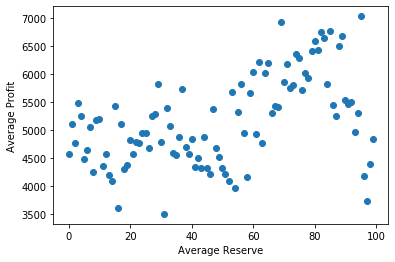

In [19]:
plt.scatter(averageReserve, averageProfit)
plt.xlabel("Average Reserve")
plt.ylabel('Average Profit')
plt.show()

Adding a reserve price definitely appeared to impact the average total profit.
A graph below shows the trend of Profit vs Reserve price.
While average profit seemed to spike between 80 and 90, there was a much more stable maximum between 70 and 80.


In [20]:
averagePrices = np.array([])
averageReserve = np.array([])
averageProfit = np.array([])
for i in range(80,100): # this range was the final test for the best reserve price.
    # Reasons are listed below, but this can be easily changed to plot
    # average profit across the entire range of eligible prices.
    prices = np.array([])
    reserves = np.array([])
    iterations = 1000
    for _ in range(iterations):
        newBuyers = generateBuyers(20)
        reserve = i
        reserves = np.append(reserves, reserve)
        increment = 1
        result = runAuction(buyers=newBuyers, startingIncrement=increment, reservePrice=reserve)
        prices = np.append(prices, result)

    numPricesAboveZero = len([p for p in prices if p > 0])
    profit = np.mean(prices) * numPricesAboveZero
    averageProfit = np.append(averageProfit, profit)
    # this should give us a better estimate of profit than just looking at the average price
    averageReserve = np.append(averageReserve, np.mean(reserves))
    averagePrices = np.append(averagePrices, np.mean(prices))

print(f"Increment: 1\nBuyers {len(newBuyers)}\nIncrement {increment}\nAverage Reserve {np.mean(averageReserve)}"
      f"\nIterations {10000}\nAverage Price {np.mean(averagePrices)}\nAverage Profit {np.mean(averageProfit)}\n\n\n")

Increment: 1
Buyers 20
Increment 1
Average Reserve 89.5
Iterations 10000
Average Price nan
Average Profit 57341.91560000001





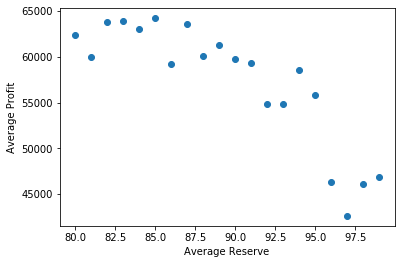

In [21]:
plt.scatter(averageReserve, averageProfit)
plt.xlabel("Average Reserve")
plt.ylabel('Average Profit')
plt.show()

To shorten the range, we run a more thorough simulation with 1000 iterations of prices between 80 and 100 showing
the average quickly falling to below 45,000 when the rserve goes above ~83.
There was a maximum profit of 63,000 at a reserve price of 83



In [22]:
averagePrices = np.array([])
averageReserve = np.array([])
averageProfit = np.array([])
for i in range(60,80): # this range was the final test for the best reserve price.
    # Reasons are listed below, but this can be easily changed to plot
    # average profit across the entire range of eligible prices.
    prices = np.array([])
    reserves = np.array([])
    iterations = 1000
    for _ in range(iterations):
        newBuyers = generateBuyers(20)
        reserve = i
        reserves = np.append(reserves, reserve)
        increment = 1
        result = runAuction(buyers=newBuyers, startingIncrement=increment, reservePrice=reserve)
        prices = np.append(prices, result)

    numPricesAboveZero = len([p for p in prices if p > 0])
    profit = np.mean(prices) * numPricesAboveZero
    averageProfit = np.append(averageProfit, profit)
    # this should give us a better estimate of profit than just looking at the average price
    averageReserve = np.append(averageReserve, np.mean(reserves))
    averagePrices = np.append(averagePrices, np.mean(prices))

print(f"Increment: 1\nBuyers {len(newBuyers)}\nIncrement {increment}\nAverage Reserve {np.mean(averageReserve)}"
      f"\nIterations {10000}\nAverage Price {np.mean(averagePrices)}\nAverage Profit {np.mean(averageProfit)}\n\n\n")

Increment: 1
Buyers 20
Increment 1
Average Reserve 69.5
Iterations 10000
Average Price nan
Average Profit 58425.81799999999





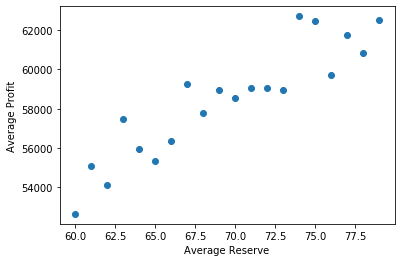

In [23]:
plt.scatter(averageReserve, averageProfit)
plt.xlabel("Average Reserve")
plt.ylabel('Average Profit')
plt.show()

Further expanding our test to look at a range between 60 and 83, we end up with a maximum of 64,000 at reserve of 76.
This is consistent with the original tests for all values between 1 and 100.
To sum up, the best profit is achieved with a reserve price around 76.


# Vegas Hotel Problem


Sample Profile

Build Threshold 0.8786384260219167
Build Profile [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Profit 9000.0



Sample Profile

Build Threshold 0.12530533955202316
Build Profile [0. 1. 1. 2. 2. 3. 3. 4. 4.]
Profit 3332.5



Sample Profile

Build Threshold 0.8418577548661368
Build Profile [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Profit 9000.0



Sample Profile

Build Threshold 0.04076502191023901
Build Profile [0. 1. 1. 2. 2. 3. 3. 4. 4.]
Profit 3332.5



Sample Profile

Build Threshold 0.24813593002365497
Build Profile [0. 1. 1. 2. 2. 3. 3. 4. 4.]
Profit 3332.5



Sample Profile

Build Threshold 0.9311605286045059
Build Profile [0. 1. 1. 1. 1. 1. 1. 1. 1.]
Profit 4900.0



Sample Profile

Build Threshold 0.011807480083207977
Build Profile [0. 1. 1. 2. 2. 3. 3. 4. 4.]
Profit 3332.5



Sample Profile

Build Threshold 0.8821362174202865
Build Profile [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Profit 9000.0



Sample Profile

Build Threshold 0.6836879171702894
Build Profile [0. 0. 0. 0. 1. 1. 1. 2. 2.]
Profit 5858.3

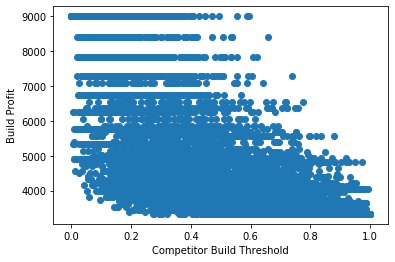

In [44]:
totalYears = 10
startingYear = 1
timeToBuild = 2

def calculateProfit(profile):
    hotelProfit = 0
    for p in range(len(profile)):
        yearProfit = (750 + (50*(p+1)))/(profile[p]+1) # need to use p+1 for t since arrays are 0 indexed
        hotelProfit += yearProfit
    return hotelProfit

def buildHotel(lastYearBuilt, currentYear, threshold, buildTime):
    if currentYear - lastYearBuilt >= buildTime:
        chanceToBuild = random.random() # if we roll above the threshold and are in a valid year we add a hotel
        if chanceToBuild > threshold:
            return 1
        else:
            return 0
    return 0

def generateCompetitorThreshold():
    return random.random() # didn't seem to be a better method to generate a construction profile

def generateBuildProfile(start, total, buildTime, threshold):
    profile = np.array([])
    current = start
    lastBuilt = 0
    currentHotels = 0
    while current < total:
        buildAgain = buildHotel(lastBuilt, current, threshold, buildTime)
        if buildAgain == 1:
            lastBuilt = current
        currentHotels += buildAgain
        profile = np.append(profile, currentHotels)
        current += 1
    return profile


testProfile = np.array([0,1,1,2,2,2,3,3,3,3])
calculateProfit(testProfile)

hotelProfits = np.array([])
competitorThresholds = np.array([])
iterations = 10000
for k in range(iterations):
    newThreshold = generateCompetitorThreshold()
    newProfile = generateBuildProfile(1, 10, 2, newThreshold)
    newProfit = calculateProfit(newProfile)
    hotelProfits = np.append(hotelProfits, newProfit)
    competitorThresholds = np.append(competitorThresholds, newThreshold)
    if k % 1000 == 0: # just for fun we'll sample 10 different profiles
        print(f'Sample Profile\n')
        print(f'Build Threshold {newThreshold}\nBuild Profile {newProfile}\nProfit {newProfit}\n\n\n')

print(f'Average Profit Per Year {np.mean(hotelProfits)}\nIterations {iterations}')

plt.scatter(1-competitorThresholds, hotelProfits)
# Use 1-threshold is essentially how aggressive a competitor is.
# More aggressive means lower threshold, so they are more likely to build a hotel
# that year.
plt.xlabel('Competitor Aggressiveness (Higher is more likely to build when able)')
plt.ylabel('Build Profit')
plt.show()

Based on the graph, the less aggressive our competitors are about building additional hotels, the larger our profit is
likely to be. It seems that across any build threshold >80% (aggressiveness <20%) we are most likely to see profits
between 4000 and 5000, with an average of ~4932.